# 28 — Interactive Plots (Widgets, Events, Cursor tools)

## Goal
Add **interaction**: hover tooltips, click events, sliders, buttons, and zoom-friendly backends.

### What you'll learn
- Choosing a backend: inline vs widget (`%matplotlib widget`)
- Mouse events: `button_press_event`, `motion_notify_event`
- Matplotlib widgets: Slider, Button
- Optional: `mplcursors` for hover tooltips
- Patterns for interactive dashboards inside Jupyter

> Note: True interactive backends may require `ipympl` and JupyterLab support.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Backend Options
In notebooks:
- `%matplotlib inline`: static images
- `%matplotlib widget`: interactive pan/zoom (needs `ipympl`)

```python
# In JupyterLab/Notebook
%matplotlib widget
```


## 2. Event Handling (Click)
You can attach callbacks to interact with plots.

```python
def on_click(event):
    print(event.xdata, event.ydata)
cid = fig.canvas.mpl_connect('button_press_event', on_click)
```


=== CLICK EVENT TEMPLATE (RUN INTERACTIVELY) ===


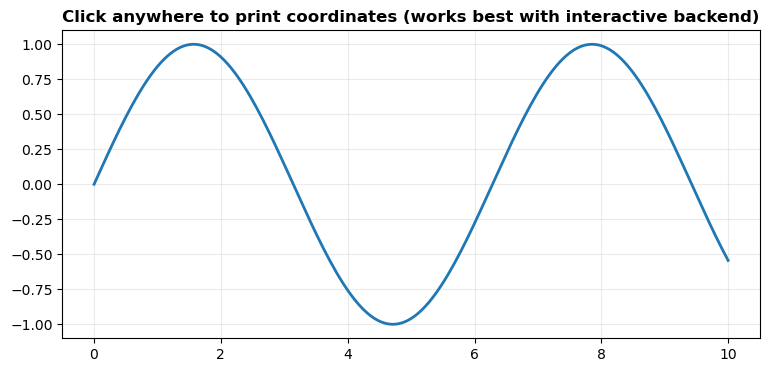

In [2]:
print('=== CLICK EVENT TEMPLATE (RUN INTERACTIVELY) ===')
x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(x, y, lw=2)
ax.set_title('Click anywhere to print coordinates (works best with interactive backend)', fontweight='bold')
ax.grid(True, alpha=0.25)

def on_click(event):
    if event.inaxes != ax:
        return
    print(f'Clicked: x={event.xdata:.3f}, y={event.ydata:.3f}')

cid = fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()

## 3. Matplotlib Widgets (Slider + Button)
Widgets work best in interactive backends. This example controls a sine wave frequency.

```python
from matplotlib.widgets import Slider, Button
```


=== SLIDER + BUTTON (RUN INTERACTIVELY) ===


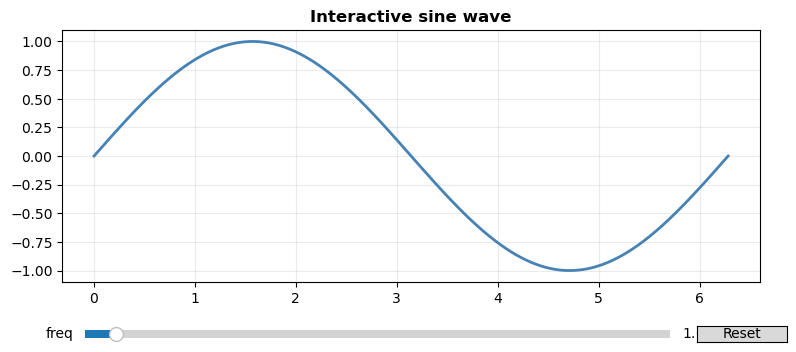

In [3]:
print('=== SLIDER + BUTTON (RUN INTERACTIVELY) ===')
from matplotlib.widgets import Slider, Button

x = np.linspace(0, 2*np.pi, 500)

fig, ax = plt.subplots(figsize=(9, 4))
plt.subplots_adjust(bottom=0.25)
line, = ax.plot(x, np.sin(x), lw=2, color='steelblue')
ax.set_title('Interactive sine wave', fontweight='bold')
ax.grid(True, alpha=0.25)

axfreq = plt.axes([0.15, 0.1, 0.65, 0.04])
sfreq = Slider(axfreq, 'freq', 0.5, 10.0, valinit=1.0, valstep=0.1)

axreset = plt.axes([0.83, 0.1, 0.1, 0.04])
breset = Button(axreset, 'Reset')

def update(val):
    f = sfreq.val
    line.set_ydata(np.sin(f*x))
    fig.canvas.draw_idle()

sfreq.on_changed(update)
breset.on_clicked(lambda event: sfreq.reset())
plt.show()

## 4. Hover Tooltips (Optional: mplcursors)
If installed, `mplcursors` provides quick hover/click tooltips.

```python
import mplcursors
mplcursors.cursor(scatter, hover=True)
```
Install:
```
pip install mplcursors
```


In [4]:
print('=== MPLCURSORS OPTIONAL DEMO ===')
try:
    import mplcursors
    x = np.random.randn(200)
    y = np.random.randn(200)
    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, s=25, alpha=0.7)
    ax.set_title('Hover tooltips with mplcursors', fontweight='bold')
    ax.grid(True, alpha=0.25)
    mplcursors.cursor(sc, hover=True)
    plt.show()
except Exception as e:
    print('mplcursors not available. Install via: pip install mplcursors')
    print('Error:', e)

=== MPLCURSORS OPTIONAL DEMO ===
mplcursors not available. Install via: pip install mplcursors
Error: No module named 'mplcursors'


## Practice + Quick Reference
### Practice
1. Build an interactive scatter where clicking a point prints its index.
2. Add two sliders (freq + amplitude).
3. Use `%matplotlib widget` and verify pan/zoom works.

### Quick reference
```python
cid = fig.canvas.mpl_connect('button_press_event', callback)
from matplotlib.widgets import Slider
sfreq = Slider(ax, 'freq', 0.5, 10.0)
```
